<a href="https://colab.research.google.com/github/JuanJoMontilla/Senales-y-Sistemas/blob/main/DesarrolloParcial1%3ASenalesySistemas2024-I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DesarrolloParcial1:SenalesySistemas2024-I

# Punto B

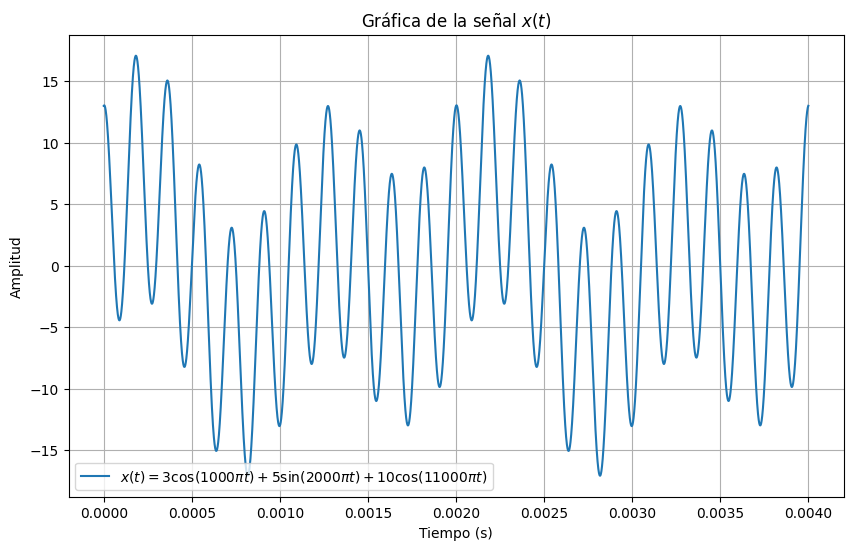

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve
from scipy.spatial.distance import cdist

#Se grafica la señal original
t = np.linspace(0, 0.004, 10000) # Se define t y damos valor al intervalo de tiempo a graficar

# Se define x_t como la señal a trabajar
x_t = 3*np.cos(1000*np.pi*t) + 5*np.sin(2000*np.pi*t) + 10*np.cos(11000*np.pi*t)

# Se grafica la señal x(t)
plt.figure(figsize=(10, 6)) # Tamaño de la figura
plt.plot(t, x_t, label='$x(t) = 3\cos(1000\pi t) + 5\sin(2000\pi t) + 10\cos(11000\pi t)$') #Agregar leyendas y nombres al gráfico
plt.title('Gráfica de la señal $x(t)$')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Se crea una función para muestrear y graficar nuestra señal
def muestrear_y_graficar(fs, duracion=0.006, titulo=''):
    """
    Muestra y grafica la señal x_t, utilizando la frecuencia de muestreo de 5kHz.

    Especificación de los parámetros:
    - fs: Frecuencia de muestreo en Hz.
    - duracion: Duración de la señal en segundos para la simulación.
    - titulo: Título para la gráfica de la señal.
    """

    T = 1/fs   # Periodo de muestreo
    t = np.arange(0, duracion, T)  # Vector de tiempo

    # Señal
    x_t = 3*np.cos(1000*np.pi*t) + 5*np.sin(2000*np.pi*t) + 10*np.cos(11000*np.pi*t)

    # Gráfica de la señal muestreada
    plt.figure(figsize=(10, 6))
    plt.stem(t, x_t, linefmt='b-', markerfmt="bo", basefmt="k")
    plt.title(titulo)
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.grid(True)
    plt.show()

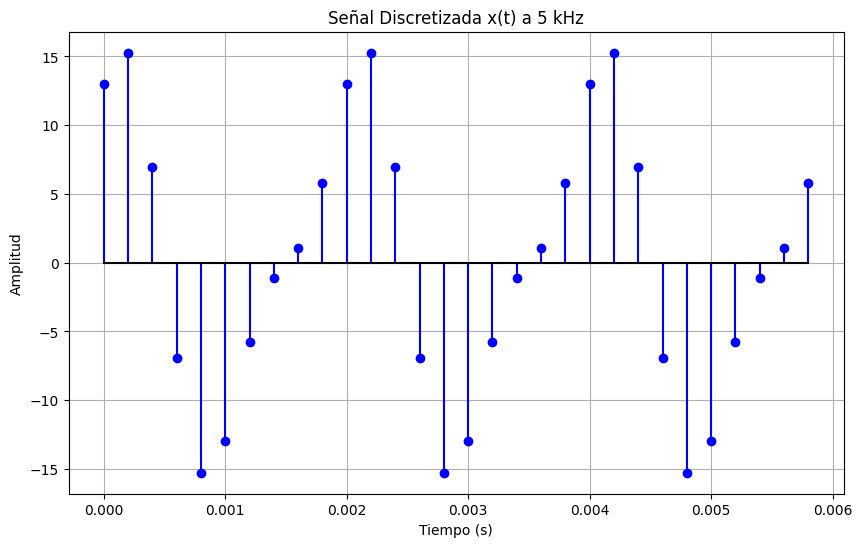

In [ ]:
#Se grafica la señal muestreada a 5KHz
muestrear_y_graficar(5000, titulo='Señal Discretizada x(t) a 5 kHz')

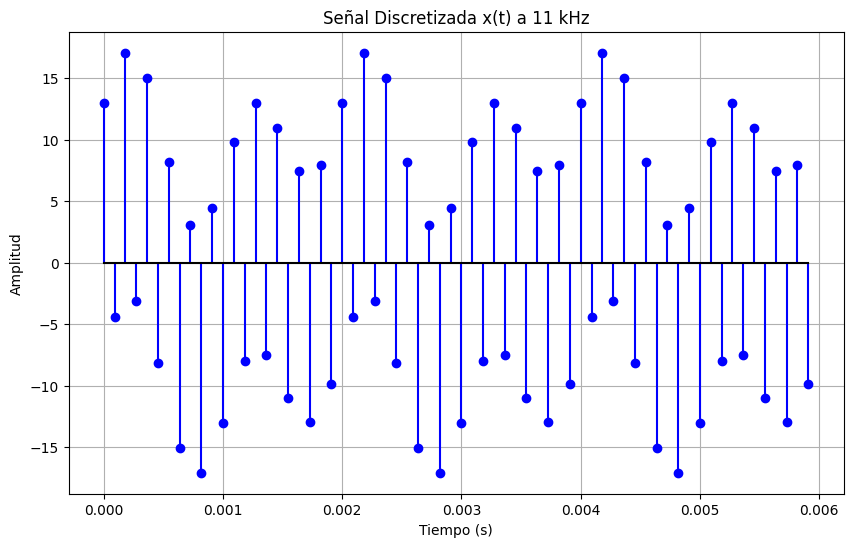

In [ ]:
#Como la frecuencia de muestreo de 5KHz no es la adecuada para la señal dada, porque esta es menor que el doble de la frecuencia más alta de la señal (5500Hz), por lo cual es necesario para evitar el aliasing según el teorema de Nyquist
#Dado lo anterior entonces asignamos un nuevo valor para fs, en este caso utilizamos 12 kHz

muestrear_y_graficar(11000, titulo='Señal Discretizada x(t) a 11 kHz')

# Punto C

In [ ]:
#Datos obtenidos mediante calculo matematico
#W1 = 1/3
#W2 = 1/4
#W1/W2 = 4/3  #Nos indica que la funcion x(t) es cuasiperiodica, y esta va a tener un periodo:
#T1 = 2pi/W1 = 2pi/(1/3) = 6pi
#T2 = 2pi/W2 = 2pi/(1/4) = 8pi
#T = T1l = T2k
#T = 6pil = 8pik
#El MCM(6,8) = 24, entonces asi el periodo nos queda:
#T = 24pi[s]

In [ ]:
#crear funcion en python
def my_ceropen(x,ymin, ymax): #en general se pueden definir valores por defecto
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x+c
  return(yv)

[1.00000000e+01 8.75529993e+00 5.63725389e+00 2.17126111e+00
 1.77635684e-15 5.18321180e-02 2.11277229e+00 5.01373022e+00
 7.30247857e+00 8.01105544e+00 7.09714197e+00 5.34321075e+00
 3.81487140e+00 3.22378176e+00 3.57266037e+00 4.26948573e+00
 4.60495713e+00 4.26948573e+00 3.57266037e+00 3.22378176e+00
 3.81487140e+00 5.34321075e+00 7.09714197e+00 8.01105544e+00
 7.30247857e+00 5.01373022e+00 2.11277229e+00 5.18321180e-02
 1.77635684e-15 2.17126111e+00 5.63725389e+00 8.75529993e+00
 1.00000000e+01 8.75529993e+00 5.63725389e+00 2.17126111e+00
 5.32907052e-15 5.18321180e-02 2.11277229e+00 5.01373022e+00
 7.30247857e+00 8.01105544e+00 7.09714197e+00 5.34321075e+00
 3.81487140e+00 3.22378176e+00 3.57266037e+00 4.26948573e+00
 4.60495713e+00 4.26948573e+00 3.57266037e+00 3.22378176e+00
 3.81487140e+00 5.34321075e+00 7.09714197e+00 8.01105544e+00
 7.30247857e+00 5.01373022e+00 2.11277229e+00 5.18321180e-02
 8.88178420e-16 2.17126111e+00 5.63725389e+00 8.75529993e+00
 1.00000000e+01 8.755299

(96, 16)

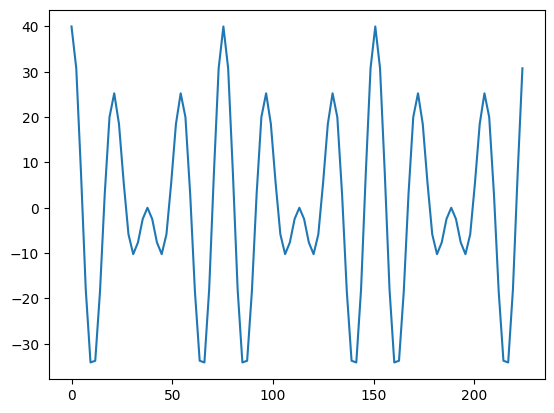

In [ ]:
#Ejemplo de señal despues de cero y pendiente y discretización
#Recuerde que el proceso de discretización debe ser implementado
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import numpy as np
#señal original
Fo = 1/(24*np.pi)
To = 24*np.pi
A = 20
Fs = 8*(1/(6*np.pi))  #asegurar nyquist
Ts = 1/Fs
tv = np.arange(0,3*To,Ts)#procesar dos periodos discretizados

y= 20*np.cos(tv/3)+20*np.cos(tv/4)
plt.plot(tv,y)
#cero y pendiente
#ycs = my_ceropen(y, ymin=onda,ymax=onda)
ycs = my_ceropen(y, ymin=0, ymax=10)
print(ycs)
print(y.shape)


#número de bits y vector de cuantización
nbits = 4
rmin = 0
rmax = 10
ve = np.linspace(rmin,rmax,2**nbits) # (rmax-rmin)/(2^#bits - 1) -> si se quiere incluir rmin y rmax

#distancias y cero pendiente a vector cuantizacion
d = cdist(ycs.reshape(-1,1),ve.reshape(-1,1)) #se utiliza reshape(-1,1) para generar vectores columna como lo pide cdist
d.shape # d es una matriz de 500 x 8, ej: la fila 1 incluye la distancia euclidea entre y[0] y los 8 elementos en ve

In [ ]:
#se requiere identificar el elemento ve[j] más cercano a y[i] para genera señal cuantizada
ind = np.argmin(d,axis=1) #el parámetro axis = 1 indica que busca la posición a lo largo de las columnas del elemento más pequeño en cada fila
ind

array([15, 13,  8,  3,  0,  0,  3,  8, 11, 12, 11,  8,  6,  5,  5,  6,  7,
        6,  5,  5,  6,  8, 11, 12, 11,  8,  3,  0,  0,  3,  8, 13, 15, 13,
        8,  3,  0,  0,  3,  8, 11, 12, 11,  8,  6,  5,  5,  6,  7,  6,  5,
        5,  6,  8, 11, 12, 11,  8,  3,  0,  0,  3,  8, 13, 15, 13,  8,  3,
        0,  0,  3,  8, 11, 12, 11,  8,  6,  5,  5,  6,  7,  6,  5,  5,  6,
        8, 11, 12, 11,  8,  3,  0,  0,  3,  8, 13])

In [ ]:
print(ycs[1],ind[1],ve[ind[1]]) # para y[50] = 0.58, el estado más cercano en ve es el elemento 1 que corresponde a ve[1]=0.71

8.755299931330228 13 8.666666666666666


In [ ]:
#función cuantización punto a punto

def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return(vq[ind])

In [ ]:
#recorrer vector cero y spam discretizado para cuantizar

for i in range(ycs.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(ycs[i],ve)
   else:
     yq = np.append(yq,my_cuantizador(ycs[i],ve)) #apilar datos cuantizando si i>0

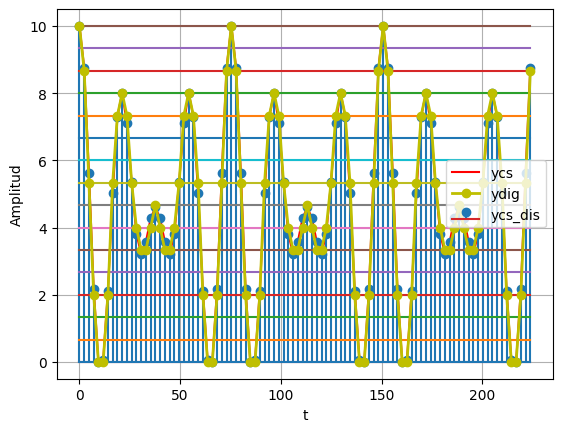

In [ ]:
#graficar señales

plt.plot(tv,ycs,c='r', label='ycs')#cs continua

plt.stem(tv,ycs, label='ycs_dis')#cs discreta

#estados de cuantización

for v in ve:
  plt.plot(tv,v*np.ones(len(tv)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(tv,yq,c='y',marker='o',label='ydig', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()

In [ ]:
he = np.array([2,4,1,5,0,10]) #respuesta al escalón del slit
h = np.diff(he)#respuesta al impulso del slit
print(h)

[ 2 -3  4 -5 10]


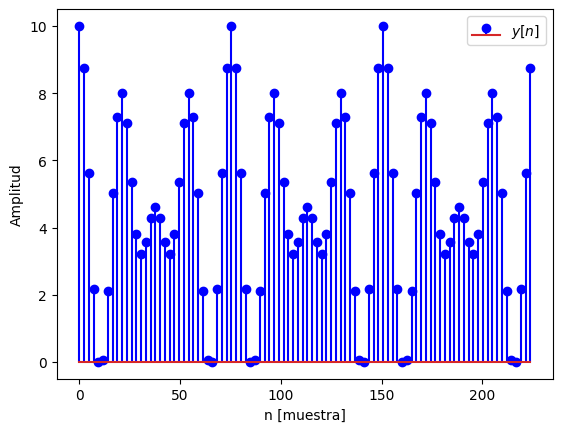

In [ ]:
y = np.convolve(ycs,h,mode='same')#respuesta del slit -> se asegura tamaños iguales con mode=same
#graficar señal
plt.stem(tv,ycs,'b',label='$y[n]$')
plt.legend()
plt.title('')
plt.xlabel('n [muestra]')
plt.ylabel('Amplitud')
plt.show()
